### Patch Attack Detector

This code extracts files from the patch dataset, augments them, and trains a 4-layer CNN.

Files needed:
* Patch vs. clean dataset
* Image for individual testing


Current issues to fix/take a look at:

* Test accuracy is higher than training: training on test set, needs bigger split, etc
* Wat da hell

In [ ]:
import zipfile
import os
from PIL import Image
import shutil

In [ ]:
cleanadv = ('patch_dataset.zip')
cleanadv_ref = zipfile.ZipFile(cleanadv, 'r')
cleanadv_ref.extractall()

In [ ]:
cleanadv_ref.close()

In [ ]:
!rm -r "test/.ipynb_checkpoints"

In [ ]:
!rm -r "train/.ipynb_checkpoints"

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(

    rescale = 1.0/255.0,
    zoom_range = 0.2,
    horizontal_flip = 'True'
)

test_gen = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
trainingx = train_gen.flow_from_directory('train',
                                          target_size = (125,125),
                                          color_mode='rgb',
                                          batch_size = 64,
                                          class_mode = 'binary')

Found 9854 images belonging to 2 classes.


In [ ]:
testx = test_gen.flow_from_directory('test',
                                          target_size = (125,125),
                                          batch_size = 64,
                                          color_mode = 'rgb',
                                          class_mode = 'binary')

Found 2462 images belonging to 2 classes.


In [ ]:
model = Sequential()

# First Convolution Layer
model.add(Conv2D(filters = 8,
                        kernel_size = 2,
                        input_shape = [125,125, 3],
                        activation = 'relu'))

model.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Second convolution Layer
model.add(Conv2D(filters = 8,
                        kernel_size = 2,
                        activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Third convolution Layer

model.add(Conv2D(filters = 8,
                        kernel_size = 2,
                        activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size = 2,
                        strides = 2))

# Fourth convolution Layer
model.add(Conv2D(filters = 8,
                        kernel_size = 2,
                        activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size = 2,
                        strides = 2))

model.add(Flatten())
model.add(Dense(units = 8,
                   activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 8)         264       
                                                                 
 dropout (Dropout)           (None, 61, 61, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 8)         2

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = optimizer,
              loss = 'binary_crossentropy', #how the amount of error is calculated
              metrics = ['accuracy']) #tested on the accuracy

In [ ]:
model.fit(x = trainingx,
          epochs = 3,
          validation_data = testx)

Epoch 1/3
154/154 [==============================] - 61s 318ms/step - loss: 0.4792 - accuracy: 0.7407 - val_loss: 0.2947 - val_accuracy: 0.9379
Epoch 2/3
154/154 [==============================] - 49s 319ms/step - loss: 0.0814 - accuracy: 0.9808 - val_loss: 0.1715 - val_accuracy: 0.9663
Epoch 3/3
154/154 [==============================] - 49s 316ms/step - loss: 0.0388 - accuracy: 0.9921 - val_loss: 0.1104 - val_accuracy: 0.9862


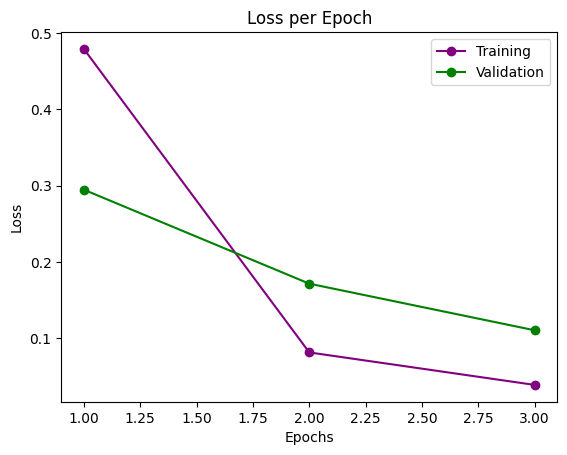

In [ ]:
epochs = [1,2,3]
train_loss = [0.4792,0.0814,0.0388]
val_loss = [0.2947,0.1715,0.1104]


# Plotting
plt.plot(epochs, train_loss, marker='o', label='Training', color='purple')
plt.plot(epochs, val_loss, marker='o', label='Validation', color='green')

# Labeling and customization
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the graph
plt.show()

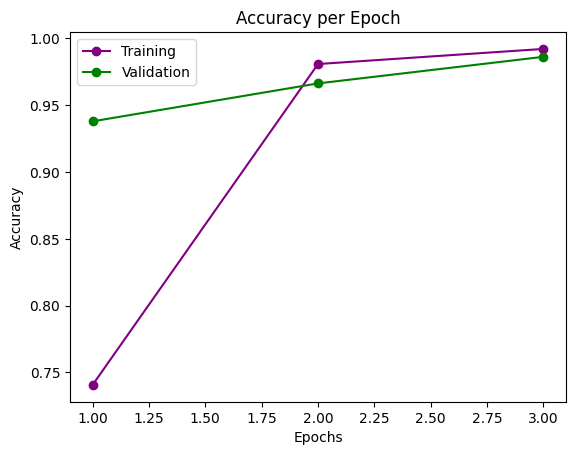

In [ ]:
epochs = [1,2,3]
train_acc = [0.7407, 0.9808,0.9921]
val_acc = [0.9379,0.9663,0.9862]


# Plotting
plt.plot(epochs, train_acc, marker='o', label='Training', color='purple')
plt.plot(epochs, val_acc, marker='o', label='Validation', color='green')

# Labeling and customization
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the graph
plt.show()

### individual predictions

In [ ]:
aewalk = Image.open('crosswalk.jpg')
walk = aewalk.resize((125,125))

In [ ]:
image = np.expand_dims(walk, axis=0)
clean_pred = model.predict(image)
print(clean_pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
patch = Image.open('perturbed_crosswalk.png')
patc = patch.resize((125,125))

In [ ]:
attacked = np.expand_dims(patc, axis=0)
attack_pred = model.predict(attacked)
print(attack_pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
def make_label(prediction):
  if (prediction <= [[0.5]]):
    return "Attack"
  else:
    return "Clean"

Text(0.5, 1.0, 'Predicted - Clean')

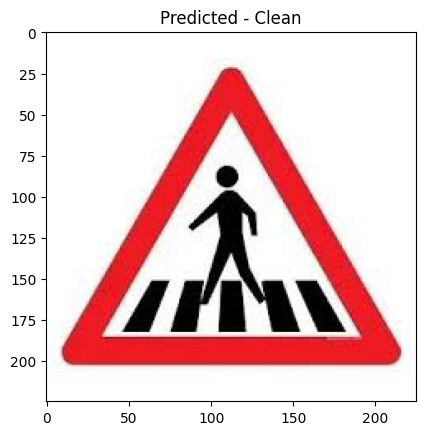

In [ ]:
plt.imshow(aewalk)
plt.title("Predicted - {}".format(make_label(clean_pred)))

Text(0.5, 1.0, 'Predicted - Clean')

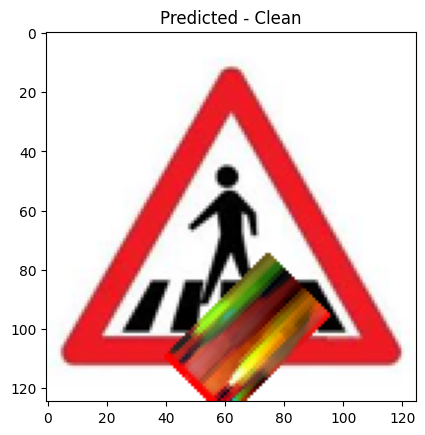

In [ ]:
plt.imshow(patch)
plt.title("Predicted - {}".format(make_label(attack_pred)))

In [ ]:
model.save('patch_attack_trained_cnn.h5')